# GetOldTweets3 패키지를 이용한 과거 트윗 수집
https://medium.com/@whj2013123218/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%9D%84-%EC%9D%B4%EC%9A%A9%ED%95%9C-twitter-%ED%81%AC%EB%A1%A4%EB%A7%81-576f7b098daf

In [1]:
# GetOldTweet3 사용 준비
try:
    import GetOldTweets3 as got
except:
    !pip install GetOldTweets3
    import GetOldTweets3 as got

  Using cached https://files.pythonhosted.org/packages/ed/f4/a00c2a7c90801abc875325bb5416ce9090ac86d06a00cc887131bd73ba45/GetOldTweets3-0.0.11-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/78/43/95d42e386c61cb639d1a0b94f0c0b9f0b7d6b981ad3c043a836c8b5bc68b/pyquery-1.4.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3b/d4/3b5c17f00cce85b9a1e6f91096e1cc8e8ede2e1be8e96b87ce1ed09e92c5/cssselect-1.1.0-py2.py3-none-any.whl


In [2]:
# BeautifulSoup4 사용 준비
try:
    from bs4 import BeautifulSoup
except:
    !pip install bs4
    from bs4 import BeautifulSoup

In [27]:
# 가져올 범위를 정의
# 예제 : 2019-04-21 ~ 2019-04-24

import datetime

days_range = []

start = datetime.datetime.strptime("2019-10-03", "%Y-%m-%d")
end = datetime.datetime.strptime("2020-01-02", "%Y-%m-%d")
date_generated = [start + datetime.timedelta(days=x) for x in range(0, (end-start).days)]

for date in date_generated:
    days_range.append(date.strftime("%Y-%m-%d"))

print("=== 설정된 트윗 수집 기간은 {} 에서 {} 까지 입니다 ===".format(days_range[0], days_range[-2]))
print("=== 총 {}일 간의 데이터 수집 ===".format(len(days_range) -1))


=== 설정된 트윗 수집 기간은 2019-10-03 에서 2019-12-31 까지 입니다 ===
=== 총 90일 간의 데이터 수집 ===


In [28]:
print(days_range)

['2019-10-03', '2019-10-04', '2019-10-05', '2019-10-06', '2019-10-07', '2019-10-08', '2019-10-09', '2019-10-10', '2019-10-11', '2019-10-12', '2019-10-13', '2019-10-14', '2019-10-15', '2019-10-16', '2019-10-17', '2019-10-18', '2019-10-19', '2019-10-20', '2019-10-21', '2019-10-22', '2019-10-23', '2019-10-24', '2019-10-25', '2019-10-26', '2019-10-27', '2019-10-28', '2019-10-29', '2019-10-30', '2019-10-31', '2019-11-01', '2019-11-02', '2019-11-03', '2019-11-04', '2019-11-05', '2019-11-06', '2019-11-07', '2019-11-08', '2019-11-09', '2019-11-10', '2019-11-11', '2019-11-12', '2019-11-13', '2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17', '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21', '2019-11-22', '2019-11-23', '2019-11-24', '2019-11-25', '2019-11-26', '2019-11-27', '2019-11-28', '2019-11-29', '2019-11-30', '2019-12-01', '2019-12-02', '2019-12-03', '2019-12-04', '2019-12-05', '2019-12-06', '2019-12-07', '2019-12-08', '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12', '2019

In [29]:
import time
query = 'hyundai'
f = open('./{}_{}_{}_{}_트위터개수'.format(days_range[0], days_range[-2], len(days_range)-1, query) + '.txt', 'w', encoding = 'utf-8')
for i, day in enumerate(days_range):
    if i >= len(days_range) -1:
        break
    start_date = days_range[i]
    end_date = days_range[i+1]
    print(i, start_date, end_date)
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch(query)\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)\
                                            .setLang('en')
    start_time = time.time()
    tweet = got.manager.TweetManager.getTweets(tweetCriteria)
    print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
    print("=== Total num of tweets is {} ===".format(len(tweet)))
    f.write('{}\t{}\t{}\n'.format(i, start_date, len(tweet)))
f.close()

0 2019-10-03 2019-10-04
=== Total num of tweets is 1005 ===
1 2019-10-04 2019-10-05
=== Total num of tweets is 831 ===
2 2019-10-05 2019-10-06
=== Total num of tweets is 677 ===
3 2019-10-06 2019-10-07
=== Total num of tweets is 638 ===
4 2019-10-07 2019-10-08
=== Total num of tweets is 1185 ===
5 2019-10-08 2019-10-09
=== Total num of tweets is 1246 ===
6 2019-10-09 2019-10-10
=== Total num of tweets is 1045 ===
7 2019-10-10 2019-10-11
=== Total num of tweets is 1009 ===
8 2019-10-11 2019-10-12
=== Total num of tweets is 1620 ===
9 2019-10-12 2019-10-13
=== Total num of tweets is 788 ===
10 2019-10-13 2019-10-14
=== Total num of tweets is 500 ===
11 2019-10-14 2019-10-15
=== Total num of tweets is 798 ===
12 2019-10-15 2019-10-16
=== Total num of tweets is 1219 ===
13 2019-10-16 2019-10-17
=== Total num of tweets is 1063 ===
14 2019-10-17 2019-10-18
=== Total num of tweets is 926 ===
15 2019-10-18 2019-10-19
=== Total num of tweets is 1200 ===
16 2019-10-19 2019-10-20
=== Total num of

=== Total num of tweets is 450 ===
87 2019-12-29 2019-12-30
=== Total num of tweets is 522 ===
88 2019-12-30 2019-12-31
=== Total num of tweets is 652 ===
89 2019-12-31 2020-01-01
=== Total num of tweets is 961 ===


# 트윗 수집하기

이제 본격적으로 트위터에서 데이터를 크롤링할 차례이다.

GetOldTweet3는 tweetCriteria로 수집 기준을 정의할 수 있다.

앞에서 설정한 수집 기간에서 어벤져스 또는 스포 가 포함된 트윗을 모두 수집해 보자.

In [4]:
# 특정 검색어가 포함된 트윗 검색하기 (quary search)
# 검색어 : 어벤져스, 스포

import time

# 수집 기간 맞추기
start_date = days_range[0]
end_date = (datetime.datetime.strptime(days_range[-1], "%Y-%m-%d") 
            + datetime.timedelta(days=1)).strftime("%Y-%m-%d") # setUntil이 끝을 포함하지 않으므로, day + 1

# 트윗 수집 기준 정의
tweetCriteria = got.manager.TweetCriteria().setQuerySearch('Kia')\
                                           .setSince(start_date)\
                                           .setUntil(end_date)\
                                           .setMaxTweets(-1)\
                                            .setLang('en')
                                            

# 수집 with GetOldTweet3
print("Collecting data start.. from {} to {}".format(days_range[0], days_range[-1]))
start_time = time.time()

tweet = got.manager.TweetManager.getTweets(tweetCriteria)

print("Collecting data end.. {0:0.2f} Minutes".format((time.time() - start_time)/60))
print("=== Total num of tweets is {} ===".format(len(tweet)))



=== Total num of tweets is 46736 ===


수집하는 데 시간이 조금 걸린다. 참고로 너무 많은 트윗을 한번에 수집하려다 보면, 트위터 측에서 나가라고 쫒아낸다.. (Error 104)

An error occured during an HTTP request: [Errno 104] Connection reset by peer

Connection 관련한 에러가 뜨면, 지정한 날짜 범위에 기준을 만족하는 트윗의 수가 너무 많은 것이니 범위를 좁혀서 다시 시도해 보자.

수집하는 데 얼마나 시간이 걸렸는지 알아보기 위해 time 을 임포트 해서 코드 몇줄을 추가했다. 참고로 나는 이 과정에서 1시간 넘게 소요된 적도 있었으니 참을성있게 기다려보자.

위 코드는 41분 가량 소요되었다. 몇개의 트윗이 수집되었는지 출력되면, 아래 단계로 넘어가자.

# 변수 저장하기

이제 원하는 정보만을 저장해 보자. GetOldTweet3 에서 제공하는 기본 변수 중 유저 아이디, 트윗 링크, 트윗 내용, 날짜, 리트윗 수, 관심글 수를 수집한다.

또한, 이 패키지에서 제공하지 않는 변수 중 각 유저의 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수도 같이 수집한다. 이때, 앞서 준비한 BeautifulSoup4 를 사용한다. 자세한 사용 방법은 이전 포스트들을 참고하자.

In [5]:
#html parser 정의하기

import requests
from bs4 import BeautifulSoup

def get_bs_obj(url):
    result = requests.get(url)
    bs_obj = BeautifulSoup(result.content, "html.parser")
    
    return bs_obj

In [6]:
# 원하는 변수 골라서 저장하기

from random import uniform
from tqdm import tqdm_notebook

# initialize
tweet_list = []

for index in tqdm_notebook(tweet):
    
    # 메타데이터 목록 
    username = index.username
    link = index.permalink 
    content = index.text
    tweet_date = index.date.strftime("%Y-%m-%d")
    tweet_time = index.date.strftime("%H:%M:%S")
    retweets = index.retweets
    favorites = index.favorites
    
    #밑에서 주석처리한 것 여기만 떼오기    # 결과 합치기
    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]
    info_list = [tweet_date,tweet_time,username,content,link,retweets,favorites]
                    #, joined_date, num_tweets, num_following, num_follower]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))
    
'''    
    # === 유저 정보 수집 시작 ===
    try:
        personal_link = 'https://twitter.com/' + username
        bs_obj = get_bs_obj(personal_link)
        uls = bs_obj.find("ul", {"class": "ProfileNav-list"}).find_all("li")
        div = bs_obj.find("div", {"class": "ProfileHeaderCard-joinDate"}).find_all("span")[1]["title"]


        # 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수
        joined_date = div.split('-')[1].strip()
        num_tweets = uls[0].find("span", {"class": "ProfileNav-value"}).text.strip()
        num_following = uls[1].find("span", {"class": "ProfileNav-value"}).text.strip()
        num_follower = uls[2].find("span", {"class": "ProfileNav-value"}).text.strip()
    
    except AttributeError:
        print("=== Attribute error occurs at {} ===".format(link))
        print("link : {}".format(personal_link))   
        pass
    
    # 결과 합치기
    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]
    info_list = [tweet_date,tweet_time,username,content,link,retweets,favorites]
                    #, joined_date, num_tweets, num_following, num_follower]
    tweet_list.append(info_list)
    
    # 휴식 
    time.sleep(uniform(1,2))
''' 

'    \n    # === 유저 정보 수집 시작 ===\n    try:\n        personal_link = \'https://twitter.com/\' + username\n        bs_obj = get_bs_obj(personal_link)\n        uls = bs_obj.find("ul", {"class": "ProfileNav-list"}).find_all("li")\n        div = bs_obj.find("div", {"class": "ProfileHeaderCard-joinDate"}).find_all("span")[1]["title"]\n\n\n        # 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수\n        joined_date = div.split(\'-\')[1].strip()\n        num_tweets = uls[0].find("span", {"class": "ProfileNav-value"}).text.strip()\n        num_following = uls[1].find("span", {"class": "ProfileNav-value"}).text.strip()\n        num_follower = uls[2].find("span", {"class": "ProfileNav-value"}).text.strip()\n    \n    except AttributeError:\n        print("=== Attribute error occurs at {} ===".format(link))\n        print("link : {}".format(personal_link))   \n        pass\n    \n    # 결과 합치기\n    #info_list = [tweet_date, tweet_time, username, content, link, retweets, favorites]\n    info_list = [tweet_date,tweet_t

(주의: 실행 시 약 24시간이 소요됩니다. 결과를 빨리 확인하려면 유저 정보 수집 부분을 전부 주석처리 해주세요.)

유저의 가입일, 전체 트윗 수, 팔로잉 수, 팔로워 수 와 같은 변수는 GetOldTweet3으로 얻은 username으로 personal_link을 만들어 수집하였다.

중간에 try-except 구문을 사용하였는데, 이는 수집을 시도해 보니 몇몇 사용자의 팔로잉 수 혹은 팔로워 수가 공개되어 있지 않아 AttributeError을 발생시키고 있었다. 이런 에러를 발생시키는 계정은 보통 광고용 찌라시 계정이었는데, 이를 확인하기 위해 에러 발생시 그 link를 출력하도록 코드를 구성하였다.

또한, 공격적인 크롤링 방지를 위해 random.uniform()을 활용하여 아래에 1~2초 사이로 랜덤하게 for문을 쉬게 하는 코드를 추가했다.

트윗 수집 결과는 tweet_list에 저장된다.

# 파일 저장하고 확인하기
이제 결과를 csv 파일로 저장하고, 저장된 파일을 불러와서 확인해 보자. Pandas 패키지를 사용할 것이다.

In [7]:
# 파일 저장하기

import pandas as pd

twitter_df = pd.DataFrame(tweet_list, 
                          columns = ["date", "time", "user_name", "text", "link", "retweet_counts", "favorite_counts"])
                                     #, "user_created", "user_tweets", "user_followings", "user_followers"])

# csv 파일 만들기
twitter_df.to_csv("2020Kia_twitter_data_{}_to_{}.csv".format(days_range[0], days_range[-1]), index=False)
print("=== {} tweets are successfully saved ===".format(len(tweet_list)))



=== 46736 tweets are successfully saved ===


위 코드를 실행시키면, working directory 내에 sample_twitter_data_2019-04-21_to_2019-04-24.csv 파일이 생성되었음을 확인할 수 있다.

생성한 파일을 로드해서 내용을 확인해 보자.

In [8]:
# 파일 확인하기

df_tweet = pd.read_csv('2020Kia_twitter_data_{}_to_{}.csv'.format(days_range[0], days_range[-1]))
df_tweet.head(10) # 위에서 10개만 출력

,date,time,user_name,text,link,retweet_counts,favorite_counts
0,2020-02-07,23:59:46,NeKiaDavenport,Basically,https://twitter.com/NeKiaDavenport/status/1225...,0,1
1,2020-02-07,23:59:42,yumenomegami,#PanicAttacksFeelLike - can’t breathe - feelin...,https://twitter.com/yumenomegami/status/122593...,31,103
2,2020-02-07,23:59:11,KiaquazaBot,what the frick,https://twitter.com/KiaquazaBot/status/1225932...,0,0
3,2020-02-07,23:58:53,_IntrovertMind,Idk if I be talking to Kira or Kia on my damn ...,https://twitter.com/_IntrovertMind/status/1225...,0,0
4,2020-02-07,23:58:50,Kia4Realz,Pop Smoke made the same song 13 times and call...,https://twitter.com/Kia4Realz/status/122593196...,0,2
5,2020-02-07,23:57:59,SheTooGrown,... i know that was the talk of the day,https://twitter.com/SheTooGrown/status/1225931...,1,3
6,2020-02-07,23:57:58,Suialii,I was just talking about Kia souls......,https://twitter.com/Suialii/status/12259317417...,0,4
7,2020-02-07,23:57:30,dekheya2,Mfn screaming,https://twitter.com/dekheya2/status/1225931622...,0,1
8,2020-02-07,23:56:54,kaniamiaaa,Well now ion wanna go,https://twitter.com/kaniamiaaa/status/12259314...,0,0
9,2020-02-07,23:56:52,xo_kia_,From The Reflection Of The Car Window,https://twitter.com/xo_kia_/status/12259314660...,0,0


# 데이터 통계 확인
수집한 데이터라 어떤 특징을 보이고 있는지 간단하게 확인해 보자.

어벤져스 또는 스포가 포함된 트윗을 수집하였는데, 각각의 빈도는 어느 정도일까?

In [9]:
# 키워드 빈도 분석하기

def get_keywords(dataframe):
    keywords = []
    text = dataframe["text"].lower()
    if "for sale" in text:
        keywords.append("for sale")
    if "super bowl" in text:
        keywords.append("super bowl")
    return ",".join(keywords)

df_tweet["keyword"] = df_tweet.apply(get_keywords,axis=1)

# barplot 그리기

import matplotlib.pyplot as plt

counts = df_tweet["keyword"].value_counts()
plt.bar(range(len(counts)), counts)
plt.title("Tweets mentioning keywords")
plt.ylabel("# of tweets")
plt.show()
print(counts)

<Figure size 640x480 with 1 Axes>

              46219
super bowl      344
for sale        173
Name: keyword, dtype: int64


barplot을 그릴 때에는 파이썬의 visualization package 중 가장 유명한 matplotlib을 사용했다.

스포 가 단일로 포함된 트윗이 14,782개로 가장 많았고, 그 뒤로 어벤져스 단일이 6,902개 , 그리고 어벤져스 와 스포 모두 포함된 트윗이 1,248개 로 파악된다.

이번에는 어벤져스 개봉일이 다가오면서 변화하는 트윗의 빈도를 출력해 보자.

2020-01-28    3524
2020-01-29    3782
2020-01-30    3681
2020-01-31    3704
2020-02-01    3945
2020-02-02    3463
2020-02-03    5581
2020-02-04    3924
2020-02-05    4433
2020-02-06    5705
2020-02-07    4994
Name: date, dtype: int64


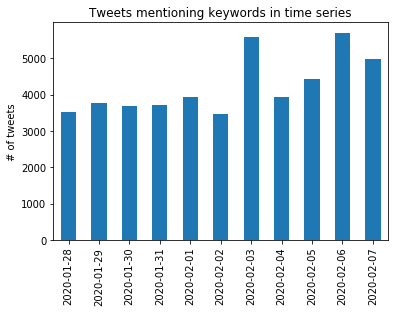

In [10]:
# 날짜별 빈도 분석하기

counts = df_tweet["date"].value_counts().sort_index()

plt.title("Tweets mentioning keywords in time series")
plt.ylabel("# of tweets")
counts.plot(kind = 'bar')
print(counts)